# Titanic Survival Prediction

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 

# Visualisation
import matplotlib.pyplot as plt

import plotly.express as px

import plotly.graph_objects as go

import seaborn as sns

%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import (train_test_split,  
                                     
                                     cross_val_score, cross_val_predict, 
                             
                                     learning_curve, KFold, 
                             
                                     StratifiedShuffleSplit, StratifiedKFold, 
                             
                                     GridSearchCV, RandomizedSearchCV)

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn import feature_selection, model_selection, metrics

from sklearn.metrics import confusion_matrix, mean_absolute_error

# Models

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

# Ensemble
from sklearn.ensemble import (VotingClassifier, StackingClassifier, 
                              
                              RandomForestClassifier, AdaBoostClassifier, 
                              
                              GradientBoostingClassifier, ExtraTreesClassifier)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df = pd.concat([train,test])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.rename(columns = lambda x: x.lower(),inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df.isnull().sum()

passengerid       0
survived        418
pclass            0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

# Investigating Data

Text(0.5, 1.0, 'The percentage of Survival')

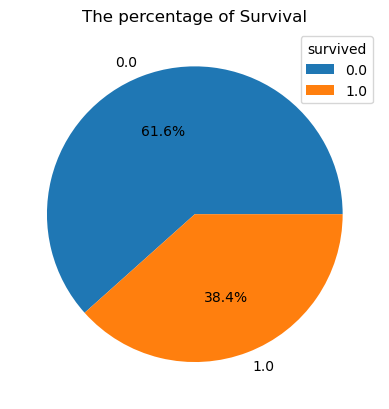

In [11]:
survival = df['survived'].value_counts()

plt.pie(survival,labels=survival.index, autopct="%1.1f%%")

plt.legend(title='survived')
plt.title('The percentage of Survival')

Only 38.4% of the total data that survived from the Titanic diaster.

## Name/title Column

Start data cleaning with 'name' column

In [12]:
df['name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: name, Length: 1309, dtype: object

In [13]:
df['title'] = df['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [14]:
df['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: title, dtype: int64

There are some 'title' that have a small number of values, so I will group them together.

In [15]:
pd.crosstab(df['survived'],df['title'])

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [16]:
df['title'] = df['title'].replace(['Miss','Ms', 'Mlle'], 'Miss')
df['title'] = df['title'].replace(['Mrs', 'Mme'], 'Mrs')
df['title'] = df['title'].replace(['Capt','Col', 'Major','Dr', 'Rev'], 'Officer')
df['title'] = df['title'].replace(['Sir','Lady','the Countess','Jonkheer','Dona','Don'], 'Royalty')

In [17]:
df['title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: title, dtype: int64

In [18]:
df.groupby(['title','survived'])['title'].value_counts()

title    survived  title  
Master   0.0       Master      17
         1.0       Master      23
Miss     0.0       Miss        55
         1.0       Miss       130
Mr       0.0       Mr         436
         1.0       Mr          81
Mrs      0.0       Mrs         26
         1.0       Mrs        100
Officer  0.0       Officer     13
         1.0       Officer      5
Royalty  0.0       Royalty      2
         1.0       Royalty      3
Name: title, dtype: int64

In [19]:
pd.crosstab(df['survived'],df['title'])

title,Master,Miss,Mr,Mrs,Officer,Royalty
survived,,,,,,
0.0,17,55,436,26,13,2
1.0,23,130,81,100,5,3


Text(0.5, 1.0, 'Distribution of survived by title')

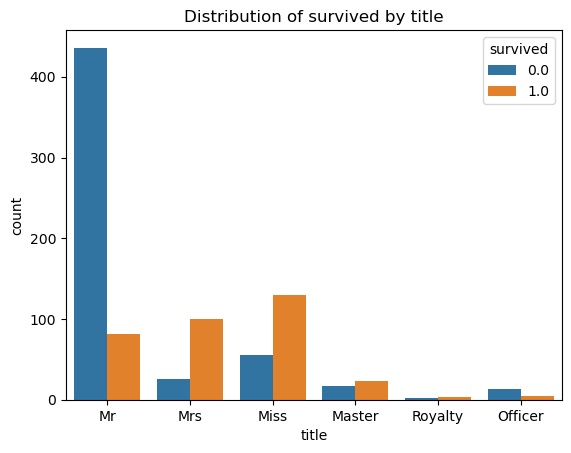

In [20]:
sns.countplot(x=df['title'], hue='survived', data=df)

plt.title('Distribution of survived by title')

Woman and children have a higher surviral rate than Man or Officer.

## sex

Text(0.5, 1.0, 'Distribution of survived by sex')

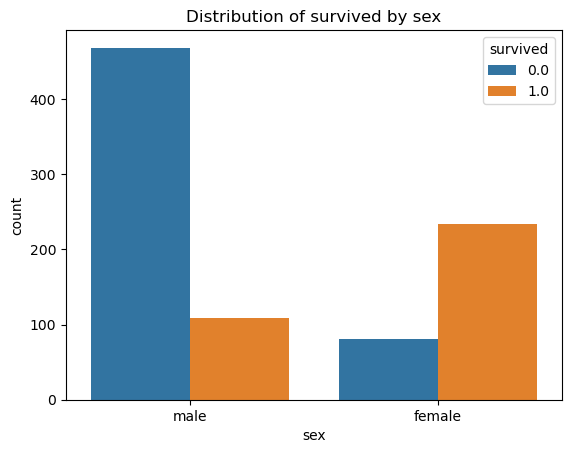

In [21]:
sns.countplot(x=df['sex'], hue='survived', data=df)

plt.title('Distribution of survived by sex')

Female have a higher survival rate than male.

## embarked

In [22]:
df['embarked'].isnull().sum()

2

In [23]:
df[df['embarked'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [24]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)

In [25]:
df['embarked'].isnull().sum()

0

In [26]:
df.groupby(['embarked','survived'])['survived'].value_counts()

embarked  survived  survived
C         0.0       0.0          75
          1.0       1.0          93
Q         0.0       0.0          47
          1.0       1.0          30
S         0.0       0.0         427
          1.0       1.0         219
Name: survived, dtype: int64

In [27]:
pd.crosstab(df['survived'],df['embarked'])

embarked,C,Q,S
survived,,,
0.0,75,47,427
1.0,93,30,219


Text(0.5, 1.0, 'Distribution of survived by embarked')

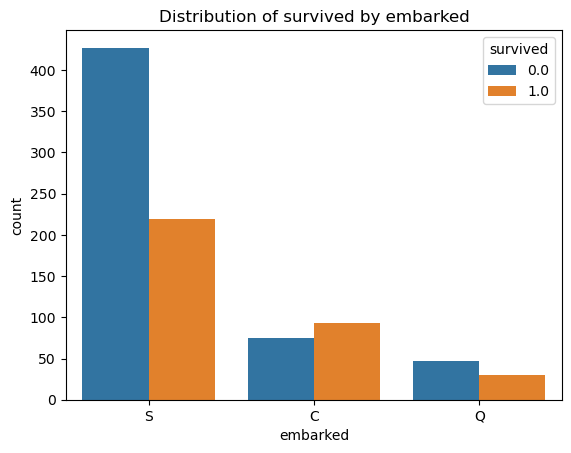

In [28]:
sns.countplot(x=df['embarked'], hue='survived', data=df)

plt.title('Distribution of survived by embarked')

embarked S have a higher chance to Died.

## cabin

In [29]:
df['cabin'].isnull().sum()

1014

In [30]:
(df['cabin'].isnull().sum() / len(df) *100).round(2)

77.46

The missing values of 'cabin' column were 77.46% of the data, that will effect the accuracy of the prediction, 

so we will not use the 'cabin' column.

In [31]:
df['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
df['cabin'].nunique()

186

In [33]:
df['cabin'] = df['cabin'].apply(lambda a: 'X' if pd.isnull(a) else a[0])

Although, I will not use the 'cabin' column because of 77% missing values,

but I am happy to learn how to write the code to fill the missing values 

and split the letter of cabin in one line of code by using lambda function.

In [34]:
df['cabin'].unique() 

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [35]:
df.groupby(['cabin','survived'])['survived'].value_counts()

cabin  survived  survived
A      0.0       0.0           8
       1.0       1.0           7
B      0.0       0.0          12
       1.0       1.0          35
C      0.0       0.0          24
       1.0       1.0          35
D      0.0       0.0           8
       1.0       1.0          25
E      0.0       0.0           8
       1.0       1.0          24
F      0.0       0.0           5
       1.0       1.0           8
G      0.0       0.0           2
       1.0       1.0           2
T      0.0       0.0           1
X      0.0       0.0         481
       1.0       1.0         206
Name: survived, dtype: int64

In [36]:
pd.crosstab(df['survived'],df['cabin'])

cabin,A,B,C,D,E,F,G,T,X
survived,,,,,,,,,
0.0,8,12,24,8,8,5,2,1,481
1.0,7,35,35,25,24,8,2,0,206


Text(0.5, 1.0, 'Distribution of survived by cabin')

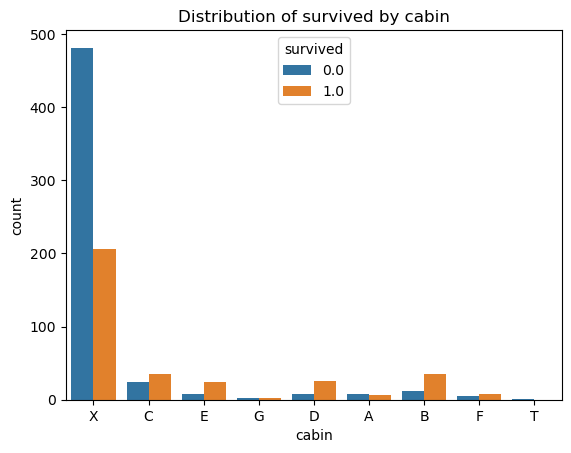

In [37]:
sns.countplot(x=df['cabin'], hue='survived', data=df)

plt.title('Distribution of survived by cabin')

## age

In [38]:
df['age'].isnull().sum()

263

In [39]:
(df['age'].isnull().sum() / len(df) *100).round(2)

20.09

In [40]:
df.groupby(['title']).age.mean()

title
Master      5.482642
Miss       21.824366
Mr         32.252151
Mrs        36.918129
Officer    46.272727
Royalty    41.166667
Name: age, dtype: float64

In [41]:
df["age"].fillna(df.groupby(['title'])['age'].transform("mean"), inplace=True)

In [42]:
df['age'].isnull().sum()

0

In [43]:
df['age_group'] = ''
df['age_group'].loc[(df['age'] < 18)] = 'young'
df['age_group'].loc[(df['age'] >= 18) & (df['age'] < 40)] = 'adult'
df['age_group'].loc[(df['age'] >= 40) & (df['age'] < 56)] = 'middle age'
df['age_group'].loc[(df['age'] >= 56)] = 'senior'

In [44]:
pd.crosstab(df['survived'],df['age_group'])

age_group,adult,middle age,senior,young
survived,,,,
0.0,392,76,27,54
1.0,218,49,12,63


Text(0.5, 1.0, 'Distribution of survived by age age_group')

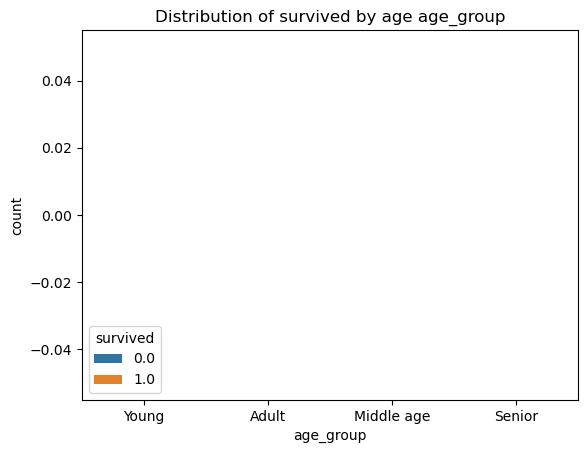

In [45]:
order = ['Young','Adult','Middle age', 'Senior']

sns.countplot(x=df['age_group'], hue='survived', data=df, order=order)

plt.title('Distribution of survived by age age_group')

In [46]:
df['age_bin'] = pd.qcut(df['age'], 4)

In [47]:
pd.crosstab(df['survived'],df['age_bin'])

age_bin,"(0.169, 21.824]","(21.824, 30.0]","(30.0, 36.0]","(36.0, 80.0]"
survived,,,,
0.0,133,126,163,127
1.0,111,79,66,86


In [48]:
label = LabelEncoder()

df['age_bin'] = label.fit_transform(df['age_bin'])

In [49]:
pd.crosstab(df['survived'],df['age_bin'])

age_bin,0,1,2,3
survived,,,,
0.0,133,126,163,127
1.0,111,79,66,86


Text(0.5, 1.0, 'Distribution of survived by age Bin')

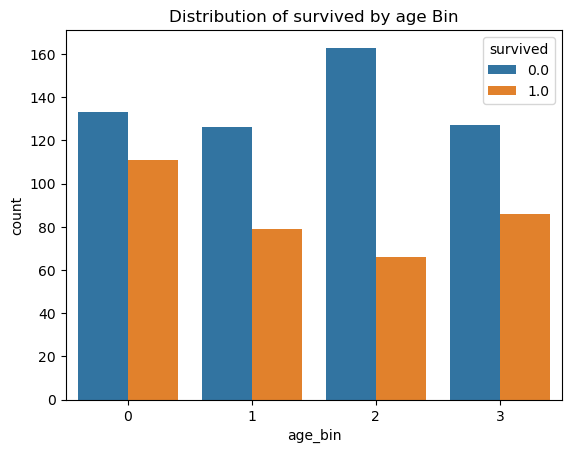

In [50]:
sns.countplot(x=df['age_bin'], hue='survived', data=df)

plt.title('Distribution of survived by age Bin')

## fare

In [51]:
df['fare'].isnull().sum()

1

In [52]:
df[df['fare'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_group,age_bin
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X,S,Mr,senior,3


In [53]:
df['fare'].fillna(df['fare'].median(), inplace = True)

In [54]:
df['fare_bin'] = pd.qcut(df['fare'], 5)

In [55]:
pd.crosstab(df['survived'],df['fare_bin'])

fare_bin,"(-0.001, 7.854]","(7.854, 10.5]","(10.5, 21.558]","(21.558, 41.579]","(41.579, 512.329]"
survived,,,,,
0.0,140,147,98,103,61
1.0,39,37,73,82,111


In [56]:
label = LabelEncoder()

df['fare_bin'] = label.fit_transform(df['fare_bin'])

In [57]:
pd.crosstab(df['survived'],df['fare_bin'])

fare_bin,0,1,2,3,4
survived,,,,,
0.0,140,147,98,103,61
1.0,39,37,73,82,111


Text(0.5, 1.0, 'Distribution of survived by fare_bin')

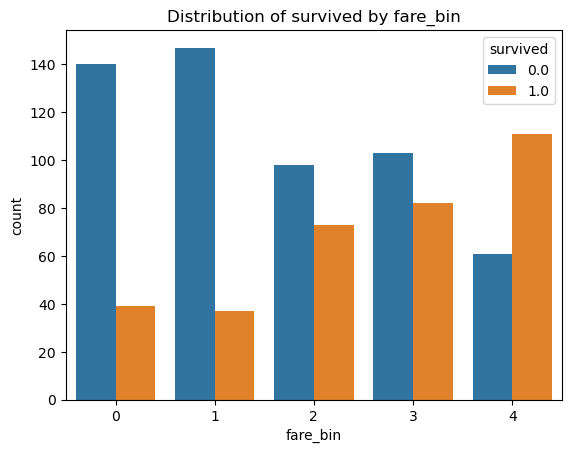

In [58]:
sns.countplot(x=df['fare_bin'], hue='survived', data=df)

plt.title('Distribution of survived by fare_bin')

## ticket class (pclass)

Text(0.5, 1.0, 'Distribution of survived by ticket class')

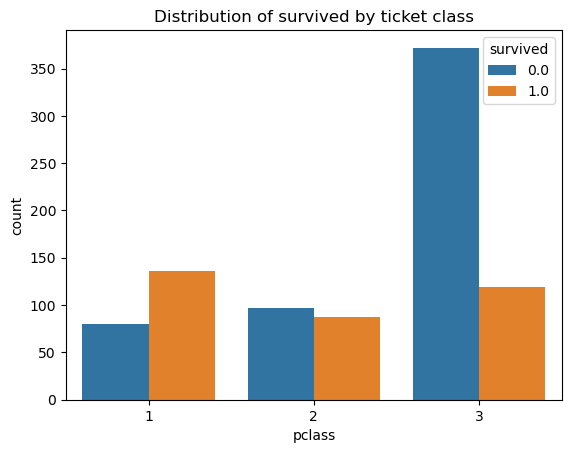

In [59]:
sns.countplot(x=df['pclass'], hue='survived', data=df)

plt.title('Distribution of survived by ticket class')

In [60]:
pd.crosstab(df['pclass'], df['title'])

title,Master,Miss,Mr,Mrs,Officer,Royalty
pclass,,,,,,
1,5,62,159,78,13,6
2,11,51,150,55,10,0
3,45,151,448,65,0,0


Text(0.5, 1.0, 'Distribution of pclass by title')

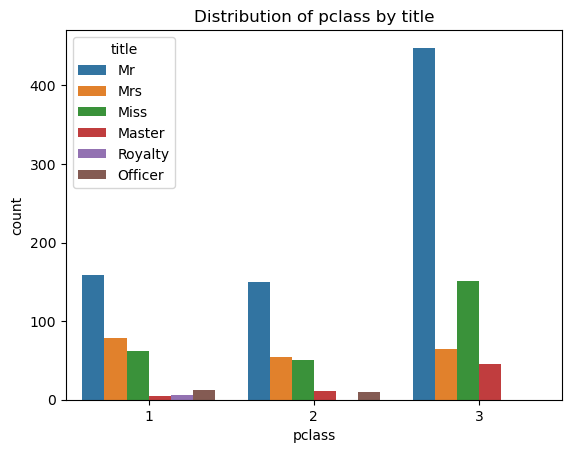

In [61]:
sns.countplot(x=df['pclass'], hue='title', data=df)

plt.title('Distribution of pclass by title')

In [62]:
pd.crosstab(df['pclass'], df['sex'])

sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


Text(0.5, 1.0, 'Distribution of pclass by sex')

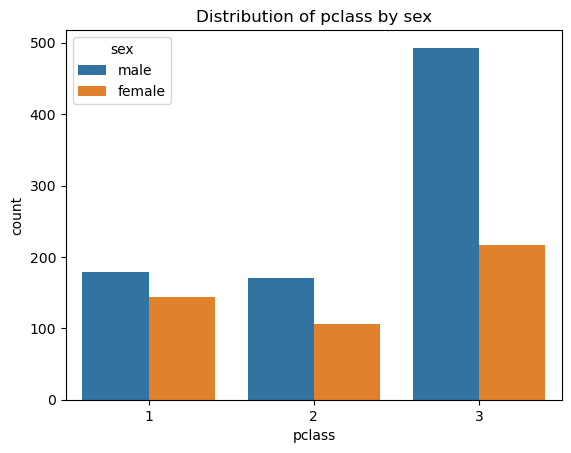

In [63]:
sns.countplot(x=df['pclass'], hue='sex', data=df)

plt.title('Distribution of pclass by sex')

## Parent/Childern (parch) and Siblings/Spouses (sibsp)

In [64]:
df['family_size'] = df['parch'] + df['sibsp'] + 1

df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_group,age_bin,fare_bin,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,adult,1,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,adult,3,4,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,adult,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,adult,2,4,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr,adult,2,1,1


In [65]:
pd.crosstab(df['survived'],df['family_size'])

family_size,1,2,3,4,5,6,7,8,11
survived,,,,,,,,,
0.0,374,72,43,8,12,19,8,6,7
1.0,163,89,59,21,3,3,4,0,0


Text(0.5, 1.0, 'Distribution of survived by Family Size')

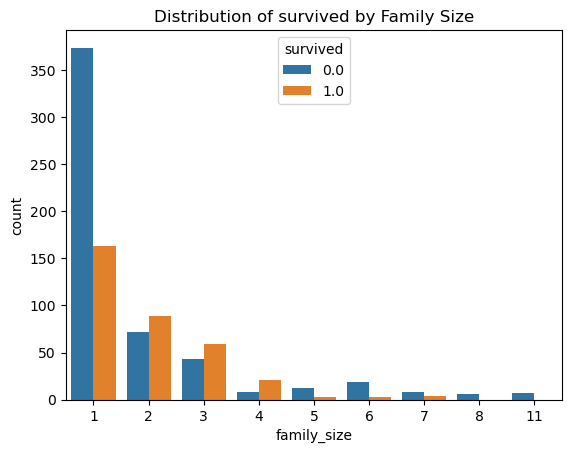

In [66]:
sns.countplot(x=df['family_size'], hue='survived', data=df)

plt.title('Distribution of survived by Family Size')

In [67]:
family_map = {1: 'alone', 
              2: 'small', 
              3: 'small', 
              4: 'small', 
              5: 'medium', 
              6: 'medium', 
              7: 'large', 
              8: 'large', 
              11: 'large'}

df['family_sizeGroup'] = df['family_size'].map(family_map)

df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_group,age_bin,fare_bin,family_size,family_sizeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,adult,1,0,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,adult,3,4,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,adult,1,1,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,adult,2,4,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr,adult,2,1,1,alone


Text(0.5, 1.0, 'Distribution of survived by Family Size Group')

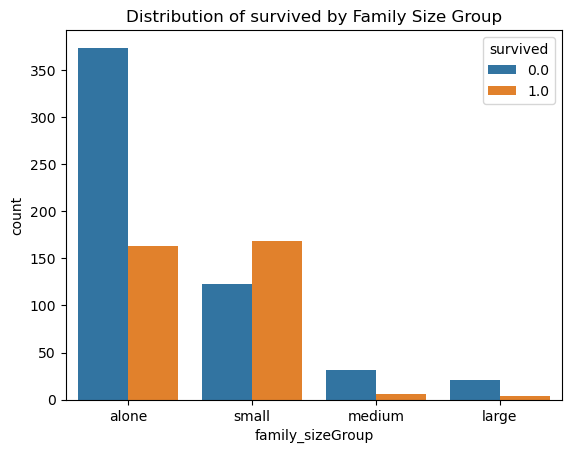

In [68]:
order=['alone','small','medium','large']

sns.countplot(x=df['family_sizeGroup'], hue='survived', data=df, order=order)

plt.title('Distribution of survived by Family Size Group')

A person who was alone had a higher chance to Died.

## Ticket

In [69]:
df['ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [70]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [71]:
df['last_name'] = df['name'].str.split(',').str[0]

In [72]:
df['last_name'].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: last_name, Length: 875, dtype: int64

In [73]:
df['last_name'].describe()

count          1309
unique          875
top       Andersson
freq             11
Name: last_name, dtype: object

In [74]:
duplicate_ticket = []
for tk in df['ticket'].unique():
    same_ticket = df[df['ticket'] == tk]['ticket']
    if (same_ticket.count()>1):
        duplicate_ticket.append(df.loc[df['ticket']==tk, ['ticket','last_name', 'fare', 'family_size', 'survived']])

duplicate_ticket = pd.concat(duplicate_ticket)
duplicate_ticket.head(14)

,ticket,last_name,fare,family_size,survived
1,PC 17599,Cumings,71.2833,2,1.0
234,PC 17599,Cumings,71.2833,2,NaN
3,113803,Futrelle,53.1000,2,1.0
137,113803,Futrelle,53.1000,2,0.0
6,17463,McCarthy,51.8625,1,0.0
146,17463,Hilliard,51.8625,1,NaN
7,349909,Palsson,21.0750,5,0.0
24,349909,Palsson,21.0750,5,0.0
374,349909,Palsson,21.0750,5,0.0
567,349909,Palsson,21.0750,5,0.0


In [75]:
df['connections'] = 0.5  #(Default values)

for _, data_same in df.groupby('ticket'):
    if (len(data_same) > 1):
        for ind, row in data_same.iterrows():
            smax = data_same.drop(ind)['survived'].max()
            smin = data_same.drop(ind)['survived'].min()
            passid = row['passengerid']
            
            if (smax == 1):
                df.loc[df['passengerid'] == passid, 'connections'] = 1
            elif (smin == 0):
                df.loc[df['passengerid'] == passid, 'connections'] = 0

df.groupby('connections')['survived'].mean()

connections
0.0    0.225352
0.5    0.297989
1.0    0.727723
Name: survived, dtype: float64

In [76]:
pd.crosstab(df['survived'],df['connections'])

connections,0.0,0.5,1.0
survived,,,
0.0,110,384,55
1.0,32,163,147


In [77]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,age_group,age_bin,fare_bin,family_size,family_sizeGroup,last_name,connections
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,adult,1,0,2,small,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,adult,3,4,2,small,Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,adult,1,1,1,alone,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,adult,2,4,2,small,Futrelle,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr,adult,2,1,1,alone,Allen,0.5


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passengerid       1309 non-null   int64  
 1   survived          891 non-null    float64
 2   pclass            1309 non-null   int64  
 3   name              1309 non-null   object 
 4   sex               1309 non-null   object 
 5   age               1309 non-null   float64
 6   sibsp             1309 non-null   int64  
 7   parch             1309 non-null   int64  
 8   ticket            1309 non-null   object 
 9   fare              1309 non-null   float64
 10  cabin             1309 non-null   object 
 11  embarked          1309 non-null   object 
 12  title             1309 non-null   object 
 13  age_group         1309 non-null   object 
 14  age_bin           1309 non-null   int32  
 15  fare_bin          1309 non-null   int32  
 16  family_size       1309 non-null   int64  
 

In [79]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'title', 'age_group',
       'age_bin', 'fare_bin', 'family_size', 'family_sizeGroup', 'last_name',
       'connections'],
      dtype='object')

In [80]:
useful_columns = ['survived', 
                  'pclass', 
                  'age_bin', 
                  'fare_bin',
                  'sex', 
                  'family_size',
                  'connections']

data_final = df[useful_columns]

data_final.head()

,survived,pclass,age_bin,fare_bin,sex,family_size,connections
0,0.0,3,1,0,male,2,0.5
1,1.0,1,3,4,female,2,0.5
2,1.0,3,1,1,female,1,0.5
3,1.0,1,2,4,female,2,0.0
4,0.0,3,2,1,male,1,0.5


In [81]:
data_final = pd.get_dummies(data_final)

data_final.head()

,survived,pclass,age_bin,fare_bin,family_size,connections,sex_female,sex_male
0,0.0,3,1,0,2,0.5,0,1
1,1.0,1,3,4,2,0.5,1,0
2,1.0,3,1,1,1,0.5,1,0
3,1.0,1,2,4,2,0.0,1,0
4,0.0,3,2,1,1,0.5,0,1


<AxesSubplot: >

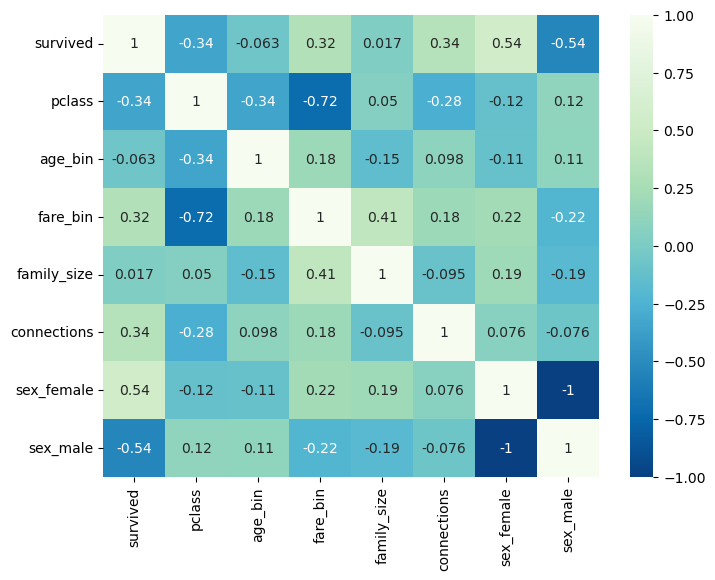

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(data_final.corr(),cmap = "GnBu_r",annot=True)

In [83]:
data_final.corr()['survived'].sort_values(ascending=False).to_frame()

,survived
survived,1.000000
sex_female,0.543351
connections,0.343614
fare_bin,0.317386
family_size,0.016639
age_bin,-0.062880
pclass,-0.338481
sex_male,-0.543351


In [84]:
df_train = data_final[:len(train)]
df_test = data_final[len(train):]

df_test.drop('survived', axis=1, inplace=True)

In [85]:
df_train.head()

,survived,pclass,age_bin,fare_bin,family_size,connections,sex_female,sex_male
0,0.0,3,1,0,2,0.5,0,1
1,1.0,1,3,4,2,0.5,1,0
2,1.0,3,1,1,1,0.5,1,0
3,1.0,1,2,4,2,0.0,1,0
4,0.0,3,2,1,1,0.5,0,1


In [86]:
X = df_train.drop('survived', axis=1)
y = df_train['survived']

# Create Basic Model

In [87]:
rf = RandomForestClassifier(random_state=0) 

rf.fit(X,y)

rf_cv = cross_val_score(rf,X,y, cv = 10,scoring = 'accuracy').mean()
rf_cv

0.8294257178526842

## Feature Importances

Text(0.5, 1.0, 'Feature Importances')

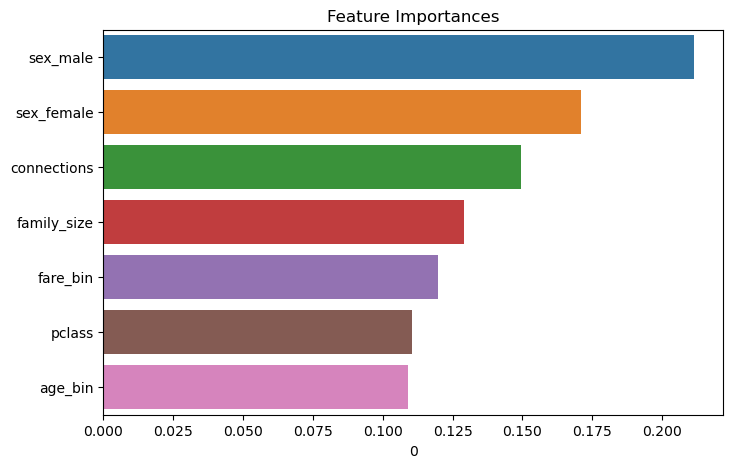

In [88]:
importances = pd.DataFrame(rf.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances).set_title('Feature Importances')

In [89]:
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','SVC','XGB','GradientB','AdaB','ExtraTrees']

models=[LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        SVC(),
        XGBClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier()]

cv_mean = []
cv_std = []

for model in models:
    model=model
    cv = cross_val_score(model,X,y,cv=10)
    cv_std.append(cv.std())
    cv_mean.append(cv.mean())

cv_dataframe = pd.DataFrame({'CV Mean':cv_mean,'Std':cv_std},index=classifiers)       
cv_dataframe=cv_dataframe.sort_values(by=['CV Mean'], ascending = False)
cv_dataframe

,CV Mean,Std
ExtraTrees,0.831685,0.041866
SVC,0.831648,0.035179
GradientB,0.831635,0.031846
Random Forest,0.828302,0.036493
XGB,0.826067,0.032084
Decision Tree,0.821561,0.041210
Logistic Regression,0.820449,0.019212
KNN,0.815943,0.035211
AdaB,0.810337,0.018289
Naive Bayes,0.793521,0.016374


# Hyperparameter Tuning

## Decision Tree Classifier

In [90]:
parameters = {'max_depth':range(1,30), 
              'criterion': ["entropy", "gini"]}

dt_tune = GridSearchCV(estimator=DecisionTreeClassifier(), 
                        param_grid=parameters, 
                        verbose=False, 
                        cv=10,
                        n_jobs = -1)

dt_tune.fit(X, y) 

dt_model = dt_tune.best_estimator_

print (dt_tune.best_score_)
print (dt_tune.best_params_)
print (dt_tune.best_estimator_)

0.8405992509363296
{'criterion': 'entropy', 'max_depth': 3}
DecisionTreeClassifier(criterion='entropy', max_depth=3)


## Support Vector Classifier (SVC)

In [ ]:
parameters = {'kernel': ['rbf'], 
              'gamma': [0.01,0.02,0.05,0.1,0.5],
              'C': [0.1, 0.5,1,2,3,4,5,6,7,8]},

svc_tune = GridSearchCV(SVC(probability=True), 
                         param_grid=parameters, 
                         cv=10) 

svc_tune.fit(X,y)

svc_model = svc_tune.best_estimator_

print(svc_tune.best_score_)
print(svc_tune.best_params_)
print(svc_tune.best_estimator_)

## k Nearest Neighbor Classifier

In [ ]:
parameters = {'n_neighbors':range(1,41), 
              'weights':['uniform','distance']}

knn_tune = GridSearchCV(estimator=KNeighborsClassifier(), 
                         param_grid=parameters,
                         cv=10,
                         verbose = False, 
                         n_jobs=-1)

knn_tune.fit(X,y)

knn_model = knn_tune.best_estimator_

print(knn_tune.best_score_)
print(knn_tune.best_params_)
print(knn_tune.best_estimator_)

## Extreme Gradient Boosting

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,
                          learning_rate= 0.01,
                          max_depth=6,
                          colsample_bytree= 0.75,
                          min_child_weight= 0.01,
                          subsample= 0.6,
                          random_state=0)

xgb_model.fit(X,y)

xgb_cv =cross_val_score(xgb_model,X,y, cv = 10,scoring = "accuracy").mean()
xgb_cv

## Random Forest

In [ ]:
rf_model = RandomForestClassifier(criterion='entropy',
                                  n_estimators=100,
                                  max_depth=7,
                                  min_samples_split=20,
                                  min_samples_leaf=6,
                                  oob_score=True,
                                  random_state=0,
                                  n_jobs=-1,
                                  verbose=0) 

rf_model.fit(X,y)

rf_cv = cross_val_score(rf_model,X,y, cv = 10,scoring = "accuracy").mean()
rf_cv

## Gradient Boosting

In [ ]:
gbm_model = GradientBoostingClassifier(n_estimators=100,
                          learning_rate= 0.01,
                          max_depth=3,
                          random_state=0)

gbm_model.fit(X,y)

gbm_cv =cross_val_score(gbm_model,X,y, cv = 10,scoring = "accuracy").mean()
gbm_cv

## Extra Tree Classifier

In [ ]:
et_model = ExtraTreesClassifier(criterion='gini',
                                n_estimators=300,
                                max_depth=6,
                                random_state=0)

et_model.fit(X,y)

et_cv =cross_val_score(et_model,X,y, cv = 10,scoring = "accuracy").mean()

et_cv

## Logistic Regression

In [ ]:
lo_model = LogisticRegression(C=0.9, penalty='l2')

lo_model.fit(X,y)

lo_cv =cross_val_score(lo_model,X,y, cv = 10,scoring = "accuracy").mean()

lo_cv

In [ ]:
scores_list=[]

scores_list = [["XGB",xgb_cv],
               ["GBM",gbm_cv],
               ["ET",et_cv],
               ["RF",rf_cv], 
               ["KNN",knn_tune.best_score_],
               ["SVC",svc_tune.best_score_],
               ["DT",dt_tune.best_score_],
               ["LO",lo_cv]
              ]

scores = (pd.DataFrame(scores_list,columns = ["Model", "Score"])).sort_values(by=["Score"], ascending=False )

scores

# Voting Classifier

## Define Estimators

In [ ]:
estimators = [('RF',rf_model),
              ('GBM',gbm_model),
              #('DT',dt_model),
              ('SVC',svc_model), 
              #('XGB', xgb_model),
              #('KNN',knn_model),
             ]

voting_model = VotingClassifier(estimators=estimators, voting='soft')

voting_soft = voting_model.fit(X, y)

voting_cv = cross_val_score(voting_model,X,y, cv = 10, scoring = "accuracy").mean()

voting_cv

## Make predictions on the test dataset

In [ ]:
voting_predict = voting_model.predict(df_test).astype(int)

voting_output = pd.DataFrame({'passengerid': test['PassengerId'],
                              'survived': voting_predict})
voting_output.to_csv('submission_vote.csv', index=False)
voting_output.head()

## Voting Classifier with Top 5 models

In [ ]:
estimators = [('RF',rf_model),
              ('GBM',gbm_model),
              ('DT',dt_model),
              ('SVC',svc_model), 
              ('XGB', xgb_model),
              #('KNN',knn_model),
             ]

voting5_model = VotingClassifier(estimators=estimators,
                                voting='soft')

voting5_soft = voting5_model.fit(X, y)

voting5_cv = cross_val_score(voting5_model,X,y, cv = 10,
                             scoring = "accuracy").mean()

voting5_cv

In [ ]:
voting5_predict = voting5_model.predict(df_test).astype(int)


voting5_output = pd.DataFrame({'passengerid': test['PassengerId'],
                              'survived': voting5_predict})
voting5_output.to_csv('submission_vote5.csv', index=False)
voting5_output.head()

# Stacking Classifier

## Define Estimators

In [ ]:
estimators = [('RF',rf_model),
              ('GBM',gbm_model),
              #('DT',dt_model),
              ('SVC',svc_model),
              ('XGB', xgb_model),
              #('KNN',knn_model),
             ]

final_estimator = lo_model

stacked_model = StackingClassifier(estimators=estimators, 
                                   final_estimator=final_estimator)

stacked_model.fit(X, y)

stacked_cv = cross_val_score(stacked_model,X,y, cv = 10,
                             scoring = "accuracy").mean()

stacked_cv

## Make predictions on the test dataset

### Stacked Predictions

In [ ]:
stacked_predict = stacked_model.predict(df_test).astype(int)

stacked_output = pd.DataFrame({'passengerid': test['PassengerId'],
                               'survived': stacked_predict})
stacked_output.to_csv('submission_stacked.csv', index=False)
stacked_output.head()

### Decision Tree Predictions

In [ ]:
dt_predict = dt_model.predict(df_test).astype(int)

dt_output = pd.DataFrame({'passengerid': test['PassengerId'],
                      'survived': dt_predict})
dt_output.to_csv('submission_dt.csv', index=False)
dt_output.head()

### Gradient Boosting Model Predictions

In [ ]:
gbm_predict = gbm_model.predict(df_test).astype(int)

gbm_output = pd.DataFrame({'passengerid': test['PassengerId'],
                      'survived': gbm_predict})
gbm_output.to_csv('submission_gbm.csv', index=False)
gbm_output.head()

### Extreme Gradient Boosting Predictions

In [ ]:
xgb_predict = xgb_model.predict(df_test).astype(int)

xgb_output = pd.DataFrame({'passengerid': test['PassengerId'],
                      'survived': xgb_predict})
xgb_output.to_csv('submission_xgb.csv', index=False)
xgb_output.head()

### Random Forest Predictions

In [ ]:
rf_predict = rf_model.predict(df_test).astype(int)

rf_output = pd.DataFrame({'passengerid': test['PassengerId'],
                      'survived': rf_predict})
rf_output.to_csv('submission_rf.csv', index=False)
rf_output.head()

# The Public score after try several submission on Kaggle:

* The public score of **Ramdom Forest Model = 0.80622**
* The public score of **Extream Gradient Boosting Model = 0.80622**
* The public score of Decision Tree Model = 0.79168


* The public score of Voting with 3 selected model = 0.79425
* The public score of Voting with 5 selected model = 0.78947
* The public score of Voting with selected ALL model = 0.78468